In [ ]:
import h5py

file_path = "test_003.h5"
with h5py.File(file_path, "r") as file:
    def print_structure(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Gruppe: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Datensatz: {name}, Form: {obj.shape}, Datentyp: {obj.dtype}")
    
    file.visititems(print_structure)


Datensatz: augmented, Form: (3829,), Datentyp: bool
Datensatz: coords, Form: (3829, 2), Datentyp: int64
Datensatz: feats, Form: (3829, 768), Datentyp: float16


In [ ]:
with h5py.File(file_path, "r") as file:
    dataset_name = "feats"
    data = file[dataset_name][:]
    print(data)
    print(data.shape)

[[ 0.04865  -0.0668    0.04736  ...  0.2129   -0.005386  0.02173 ]
 [ 0.09515  -0.1682    0.01325  ...  0.00448  -0.06158  -0.003752]
 [ 0.05078  -0.08954   0.0496   ...  0.00519  -0.05655  -0.01714 ]
 ...
 [ 0.1858   -0.1421   -0.02339  ... -0.001616  0.074     0.0738  ]
 [ 0.01364  -0.1432    0.00313  ... -0.0221    0.10815   0.1848  ]
 [ 0.155    -0.0848   -0.03024  ... -0.0238    0.09863   0.05908 ]]
(3829, 768)


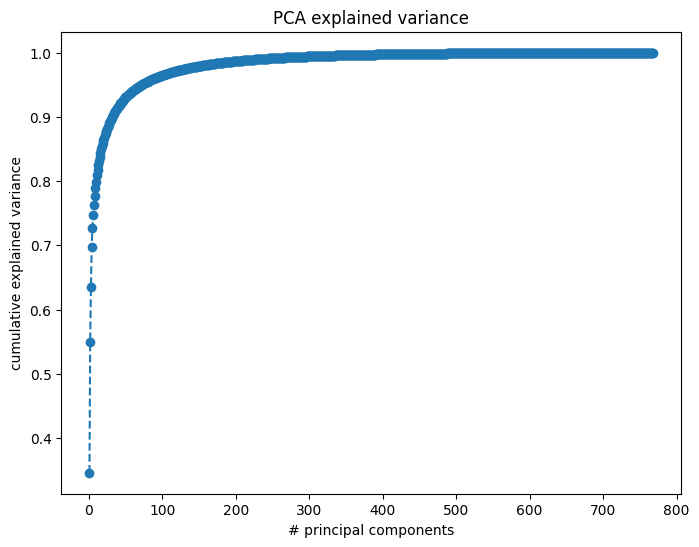

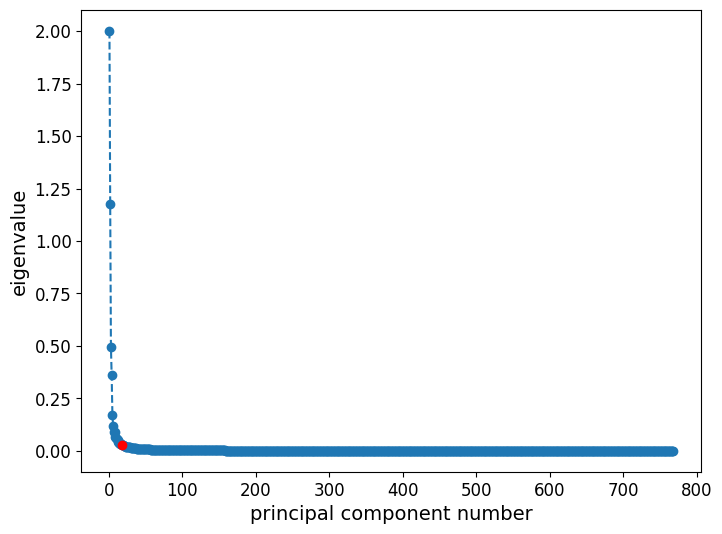

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

pca = PCA(n_components=None)
pca_data = pca.fit_transform(data)

# Plot the cumulative explained variance graph
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance')
plt.title('PCA explained variance')

# Plot the elbow graph
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
# Automatically find the elbow point
elbow = KneeLocator(range(1, len(eigenvalues) + 1), eigenvalues, curve='convex', direction='decreasing').elbow
plt.scatter([elbow], [eigenvalues[elbow-1]], c='red', zorder=5)
plt.xlabel('principal component number', fontsize=14)
plt.ylabel('eigenvalue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Text(0.5, 1.0, 'projection onto pc 2 & 3')

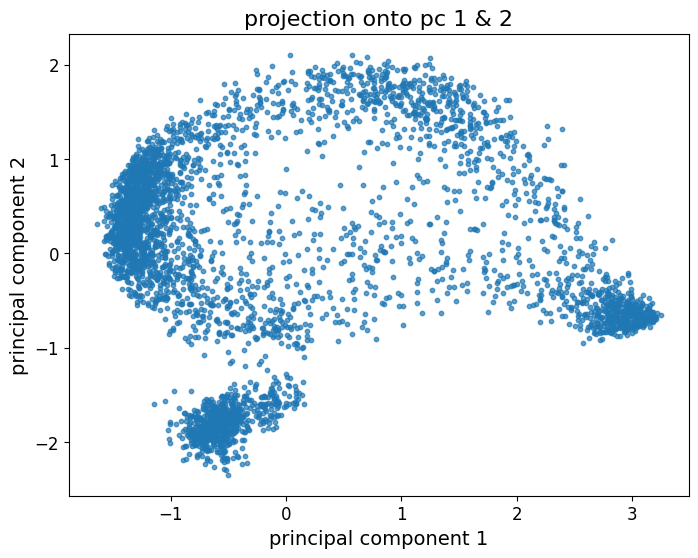

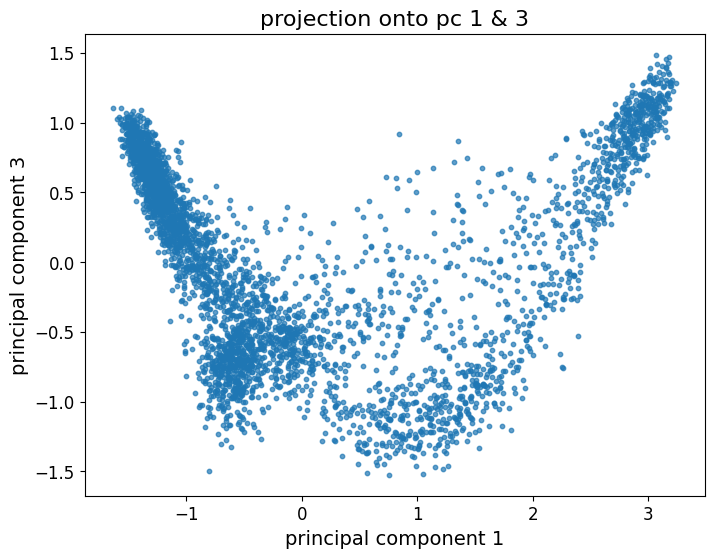

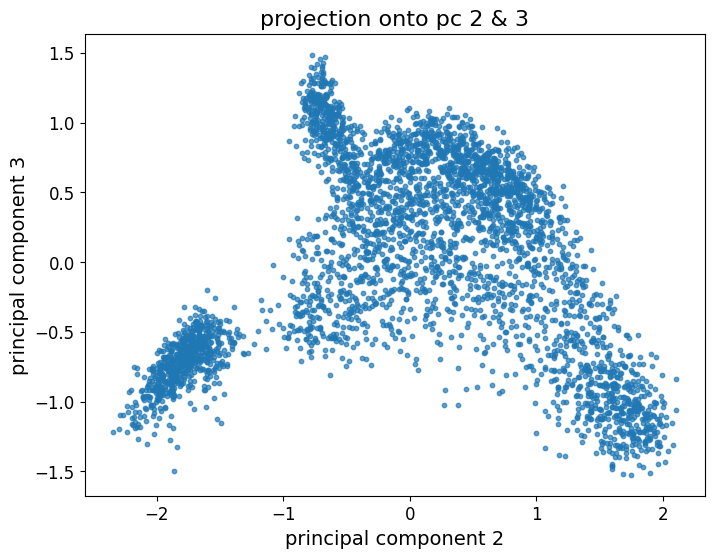

In [4]:
# Plot the spike waveforms projected on different combinations of the principal components

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, alpha=0.7)
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 1 & 2', fontsize=16)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 2], s=10, alpha=0.7)
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 1 & 3', fontsize=16)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 1], pca_data[:, 2], s=10, alpha=0.7)
plt.xlabel('principal component 2', fontsize=14)
plt.ylabel('principal component 3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 2 & 3', fontsize=16)

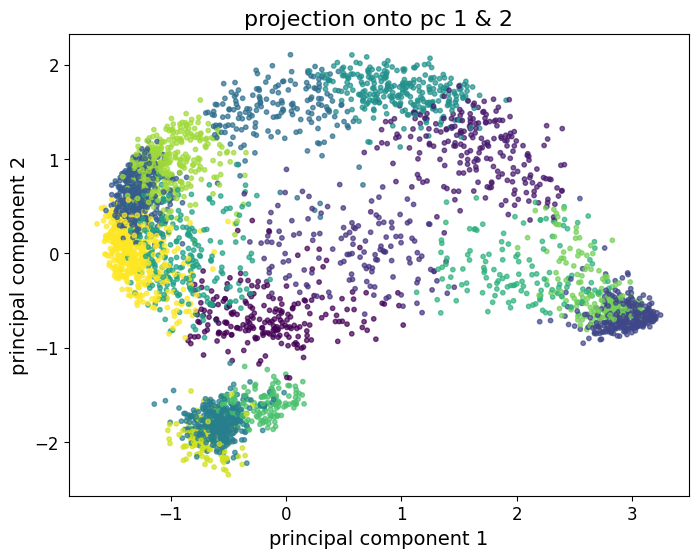

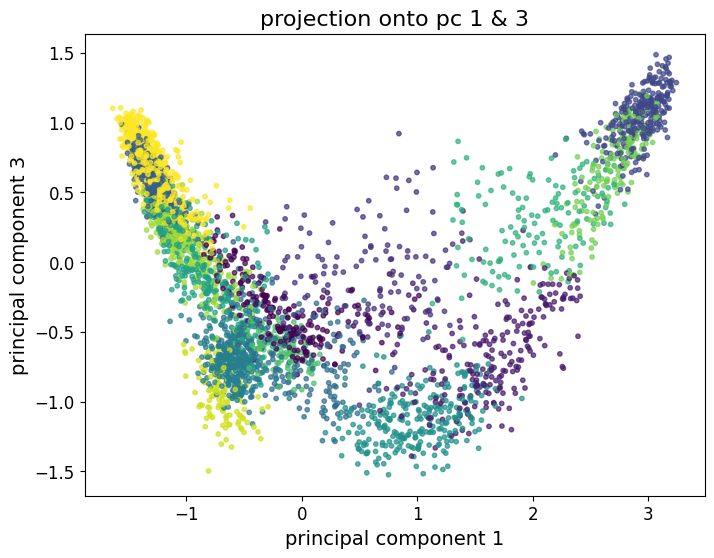

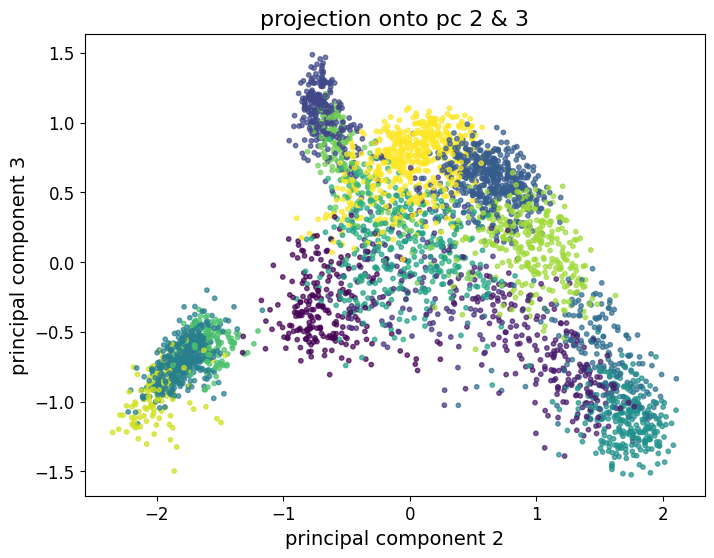

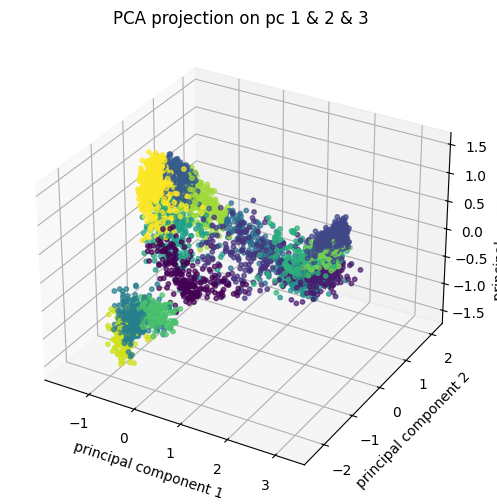

In [7]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

pcaN = PCA(n_components=elbow-1)
pcaN_data = pcaN.fit_transform(data)

clusterer = KMeans(n_clusters=15, n_init=10)
#clusterer = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='cluster_qr', n_neighbors=10)
#clusterer = GaussianMixture(n_components=4, random_state=0)
cluster_labels = clusterer.fit_predict(pcaN_data)

#colors = np.array(['tab:blue', 'tab:green', 'tab:orange', 'tab:purple'])
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pcaN_data[:, 0], pcaN_data[:, 1], c=cluster_labels, s=10, alpha=0.7)
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 1 & 2', fontsize=16)
plt.figure(figsize=(8, 6))
plt.scatter(pcaN_data[:, 0], pcaN_data[:, 2], c=cluster_labels, s=10, alpha=0.7)
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 1 & 3', fontsize=16)
plt.figure(figsize=(8, 6))
plt.scatter(pcaN_data[:, 1], pcaN_data[:, 2], c=cluster_labels, s=10, alpha=0.7)
plt.xlabel('principal component 2', fontsize=14)
plt.ylabel('principal component 3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('projection onto pc 2 & 3', fontsize=16)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(pcaN_data[:, 0], pcaN_data[:, 1], pcaN_data[:, 2], c=cluster_labels, s=10, alpha=0.7)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('PCA projection on pc 1 & 2 & 3')

plt.show()